In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import scipy
from scipy import interpolate
from scipy import integrate
#np.set_printoptions(threshold=sys.maxsize)
N = 10000 # number of iterator steps
H_to_K = 1/0.000003166808534191
dr = 0.00102
def percent_diff(x1,x2):
    C = (abs(x2-x1)/((x1+x2)/2))*100
    return C

# $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
## $C_{12} = 3.05\times10^{8} E_{h}a_{0}, C_{6} = 4710 E_{h}a_{0}$
## $r_{1} + N \cdot dr = r_{2}$

C:\Users\nienn\AppData\Local\Temp\ipykernel_16692\2153608842.py:17: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt(2*mu*(Eo - Vr))


 min of Vr = -5741.95293656363K
 r1max = 6.33694314956665ao
-5741.95293656363
 The ratio Eo/V(r) at r = 60ao is equal to -3.1369601707185214e-05


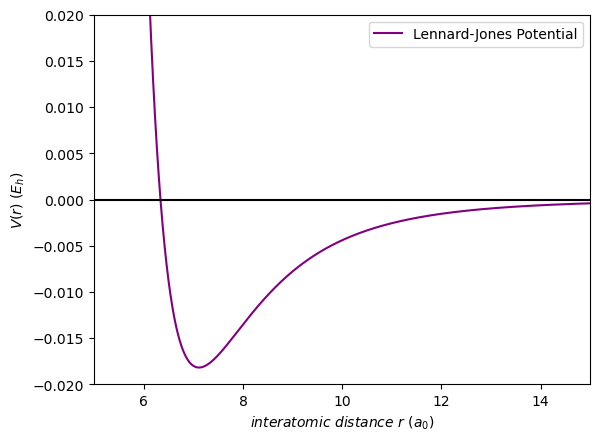

In [3]:
tol = 1e-4
#r1 = np.linspace(1e-2, 6, 500) #rmin in ao
r = np.linspace(4.5,60, N) # range of r values to iterate over, ~0 -> 80 Bohr radii
#psi = np.zeros(N)  # Initializing psi(r) as array of zeros

C12 = 3.05e8 #C12 coefficient in Eh*ao
C6 = 4710 #C6 coefficient in Eh*ao
Vr = (C12*(1/(r**12))) - (C6*(1/(r**6)))
Eo = 3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g*(1/me) # rubidium mass in au
mu = (mrb**2)*(1/(2*mrb)) # reduced mass of rubidium
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)*(1/(me*e**2)) # Bohr radius in cgs
k = np.sqrt(2*mu*(Eo - Vr))

lambda_min = (2*np.pi)*(1/(np.sqrt(2*mu*(Eo - min(Vr)))))
#print(f' lambda min = {lambda_min}ao')
#print(f' dr = {lambda_min/20}ao')

drmax = lambda_min*(1/20)
#print(f' dr = {dr}')

#print(f' mu = {mu}')
plt.plot(r, Vr, label = 'Lennard-Jones Potential', color = 'purple')
plt.hlines(0,0, max(r), color = 'black')
#plt.hlines(Eo,0, max(r), color = 'green')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{0})$')
plt.ylabel('$V(r)$ $(E_{h})$')
plt.ylim(-0.02, 0.02)
plt.xlim(5,15)
plt.legend()


print(f' min of Vr = {min(Vr)*H_to_K}K')

def bisection(f, d, b, tol=1e-6):
    """
    Find a root of f(x) in the interval a<x<b, using bisection search.

    A valid interval must have a < b, and f(a) and f(b) must have opposite signs.

    Returns: 
        A root of x0, i.e. a solution to f(x0) = 0.

    Args:
        f: function to be studied; should take one argument.
        a: lower end of search interval
        b: upper end of search interval

        tol: error tolerance for result (default: 1e-6)

     If either f(d) or f(b) is zero, then we already have a solution! """
    
    if f(d) == 0:
        return a
    if f(b) == 0:
        return b

    # Spot check for valid interval
    assert b>d
    if f(b) * 1/f(d) > 0:
        return 'invalid interval'

    while (b-d) > tol:
        c = (d+b)/2
        if f(c) * 1/f(d) < 0:
            # c and a have opposite sign: new interval is [d,c]
            b = c
        elif f(c) * 1/f(b) < 0:
            # c and b have opposite sign: new interval is [c,b]
            d = c
        else:
            # Only other possibility is that f(c) was exactly zero!
            return c
    else:
        return (d+b)*0.5  # Think: why not `return c`?
for i in range(len(Vr)):
    if Vr[i] == min(Vr):
        min_i = i
#print(f'min index = {min_i}')
#print(f'min index of V = {Vr[min_i]*H_to_K}')
def Vrr(r_range):
    LJPotential = (C12*(1/(r_range**12))) - (C6*(1/(r_range**6)))
    return LJPotential
r1max = bisection(Vrr,6,7)
print(f' r1max = {r1max}ao')

plt.vlines(Vr[min_i], -1, 1, color = 'black')
print(Vr[471]*H_to_K)

print(f' The ratio Eo/V(r) at r = {int(r[-1])}ao is equal to {Eo/Vr[-1]}')

# Goal 1: Deal with wave function blowing up (remains POSTPONED)

# Goal 2: Set r1 reasonable, converge wrt r2 by observing a convergence of the scattering length
### When setting a new r2, make sure and add additional points to ensure dr is the same 

## $\psi(r_{n+1}) = \frac{2(1-\frac{5}{12}(h)^2k^2_{n})\psi_{n} - (1 + \frac{1}{12}(h)^2k^2_{n-1})\psi_{n-1}}{1 + \frac{1}{12}(h)^2k^2_{n+1}}    $

numpts = 9446


(0.0, 70.0)

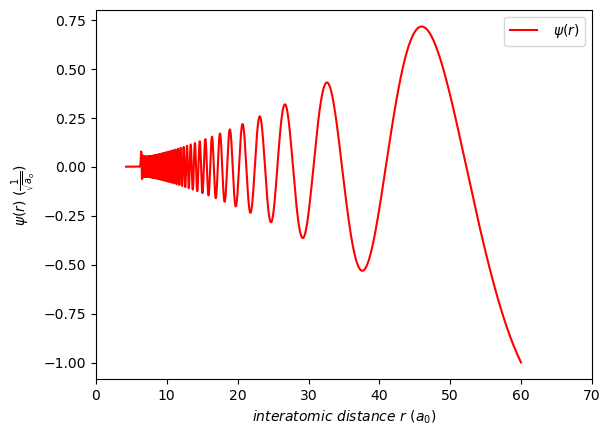

In [7]:
def wavefunction(Energy, M, rmin, rmax, h): # Numerov method function to find psi(r)
    global psi
    r_range = np.linspace(rmin, rmax, M)
    VLJ = (C12*(1/r_range**12)) - (C6*(1/r_range**6))
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = 1e-5 # let psi(1) = 1e-5
    #print(f' psi[1] = {psi[1]}')
    #print(f' dr = {h}')
    ksq = 2*mu*(Energy - VLJ) # wave number squared for the energy
    #print(f' len(Psi_fct) = {len(psi)}')
    #print(f' len(r range) = {len(r_range)}')
    #print(f' len(ksq_fct) = {len(ksq)}')
    #print(f' len(VLJ_fct) = {len(VLJ)}')
    for i in range(2,M):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        psi[i] = ((2*(1 - (5/12)*(h**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(h**2)*ksq[i-2])*psi[i-2]))*(1/(1 + (1/12)*(h**2)*ksq[i]))
        #if i < 50:
            #print(ksq)
            #print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1])}')
            #print(f' numerator is {((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))}')
            #print(f' denominator is {(1 + (1/12)*(dr**2)*ksq[i])}')
            #print(psi[i])
       # if i == 3: 
        #    print(f' for i = {i}')
         #   print(f' psi = {psi[i]}')
          #  print(f' dr = {dr}')
          #  print(f' ksq = {ksq[i]}')

       # if i == 9131:
       #     print(f' for i = {i}')
       #     print(f' psi = {psi[i]}')
       #     print(f' dr = {dr}')
       #     print(f' ksq = {ksq[i]}')
       # Psi_f = psi/abs(max(psi))
    

            
    return psi*(1/max(abs(psi)))

r2 = 60 #r2 in ao
r1 = 4.25 #r1 in ao
numpts = int(((r2 - r1)/drmax) + 1)
print(f'numpts = {numpts}')
psi = np.zeros(numpts)

Psi = wavefunction(Eo, numpts, r1, r2, drmax)
plt.plot(np.linspace(r1,r2, numpts), Psi, label = f' $\\psi(r)$', color = 'red')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{0})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()
plt.xlim(0,70)




### $\delta = tan^{-1}(\frac{k\psi_{n}}{\frac{d\psi_{n}}{dr}}) - kr $ with $\psi_{n}$, $\frac{d\psi_{n}}{dr}$ evaluated at $ r = r2$
### $\delta = -k(r2)a_{s}$ given $\frac{Eo}{min(V_{LJ})} \ll 1$

#### Problem: We require $Eo \ll V_{o}$ for our delta and scattering length approximations to hold, yet we need r2 big enough such that Vo $\approx$ 0 and $\psi(r) = sin(kr + \delta)$ 

### As E,k ⟶ 0, 
### $\psi(r)$ = sin$(kr + \delta)$ ⟶ sin$(kr)$cos$(\delta)$ + sin$(\delta)$cos$(kr)$ $\approx$  $kr$cos$(\delta)$ + sin$(\delta)$ 
### $\psi'(r)$ = $k$cos$(kr + \delta)$ ⟶ k(cos$(kr)$cos$(\delta)$ - sin$(\delta)$sin$(kr)$) $\approx$ k(cos$(\delta)$ - $kr$sin$(\delta)$)
### $\psi(r)$ = $f(r)$ for some linear function f, find the tangent line at the point $(r_{2}, \psi(r_{2}))$ and find the point of intersection with the r-axis

## m = $\psi'(r_{2})$ = k(cos$(\delta)$ - $kr_{2}$sin$(\delta)$)
## $f(r) - f(r_{2})$ $=$ m$(r - r_{2})$
## $f(r_{2}) = \psi(r_{2})$
## Now trace down and find $r_{o}$ st $f(r_{o}) = 0$, then $r_{o} = a_{s}$

In [10]:
r1 = 4.6 # ao
r2 = 2500 # ao
numpts = int(((r2 - r1)*(1/dr)) + 1)
rr = np.linspace(r1,r2, numpts)
#print(f'numpts = {numpts}')
psi = np.zeros(numpts)
Psi = wavefunction(Eo, numpts, r1, r2, dr)
Psi_prime = np.gradient(Psi, rr)
VLJ = (C12*(1/(rr**12))) - (C6*(1/(rr**6)))
ko2 = 2*mu*(Eo - VLJ[-1])
kEsmall = 2*mu*(Eo)
print(f' percent_diff(k(with pot), kapprox = {percent_diff(ko2, kEsmall)}')
print(f' kr = {np.sqrt(ko2)*r2}')
    #ko2min = 2*mu*(Eo - min(VLJ_r2))
    #if i == 0:
        #print(f' len(Psi) = {len(Psi_r1)}')
        #print(f' len(r1) = {len(r1_range)}')
        #print(f' len(ksq) = {len(ko1)}')
        #print(f' len(VLJ) = {len(VLJ_r1)}')
delta = np.arctan((np.sqrt(ko2)*Psi[-1])*(1/(Psi_prime[-1]))) - np.sqrt(ko2)*rr[-1]
m = np.sqrt(ko2)*(np.cos(delta) - np.sqrt(ko2)*r2*(np.sin(delta)))
psip_r2 = Psi_prime[-1]
print(f" m = {m}, and psi'(r2) = {psip_r2}")
print(f" m/psi'(r2) = {m/psip_r2}")



 percent_diff(k(with pot), kapprox = 0.0006091969573759792
 kr = 1.7560364720545312
 m = -0.0007210771777220831, and psi'(r2) = -0.0001188664990412025
 m/psi'(r2) = 6.066277576427462


In [11]:
x = np.linspace(1e-20,2*np.pi,300)
y = np.sin(x)
for i in range(len(x)):
    if abs(percent_diff(x[i],y[i])) > 1:
        print(f' at x = {round(x[i-1],3)} is the largest x such that sin(x) = x within 1%')
        break
for i in range(len(x)):
    if abs(percent_diff(x[i],y[i])) > 5:
        print(f' at x = {round(x[i-1],3)} is the largest x such that sin(x) = x within 5%')
        break

 at x = 0.231 is the largest x such that sin(x) = x within 1%
 at x = 0.525 is the largest x such that sin(x) = x within 5%


# plug in E = 0

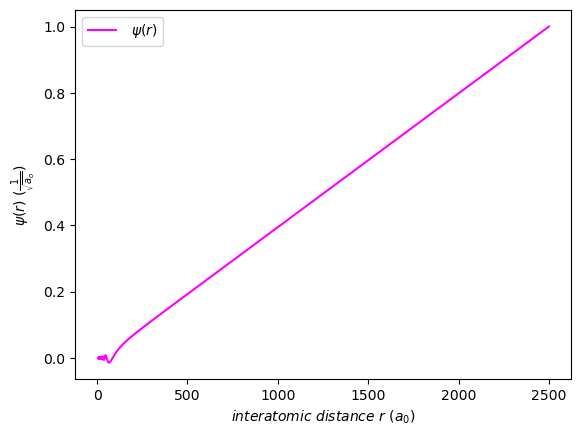

In [13]:
Elim = 0
r1 = 4.6 # ao
r2 = 2500 # ao
numpts = int(((r2 - r1)*(1/dr)) + 1)
rr = np.linspace(r1,r2, numpts)
#print(f'numpts = {numpts}')
psi = np.zeros(numpts)
Psi = wavefunction(Elim, numpts, r1, r2, dr)
Psi_prime = np.gradient(Psi, rr)
VLJ = (C12*(1/(rr**12))) - (C6*(1/(rr**6)))
ko2 = 2*mu*(Elim - VLJ[-1])
kEsmall = 2*mu*(Elim)
#print(f' percent_diff(k(with pot), kapprox = {percent_diff(ko2, kEsmall)}')
#print(f' kr = {np.sqrt(ko2)*r2}')
    #ko2min = 2*mu*(Eo - min(VLJ_r2))
    #if i == 0:
        #print(f' len(Psi) = {len(Psi_r1)}')
        #print(f' len(r1) = {len(r1_range)}')
        #print(f' len(ksq) = {len(ko1)}')
        #print(f' len(VLJ) = {len(VLJ_r1)}')
delta = np.arctan((np.sqrt(ko2)*Psi[-1])*(1/(Psi_prime[-1]))) - np.sqrt(ko2)*rr[-1]
m = np.sqrt(ko2)*(np.cos(delta) - np.sqrt(ko2)*r2*(np.sin(delta)))
psip_r2 = Psi_prime[-1]
#print(f" m = {m}, and psi'(r2) = {psip_r2}")
#print(f" m/psi'(r2) = {m/psip_r2}")

plt.plot(rr, Psi, color = 'fuchsia', label = f' $\\psi(r)$')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{0})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

#plt.xlim(0,70)

 ao = 21.60696456004224 Bohr radii


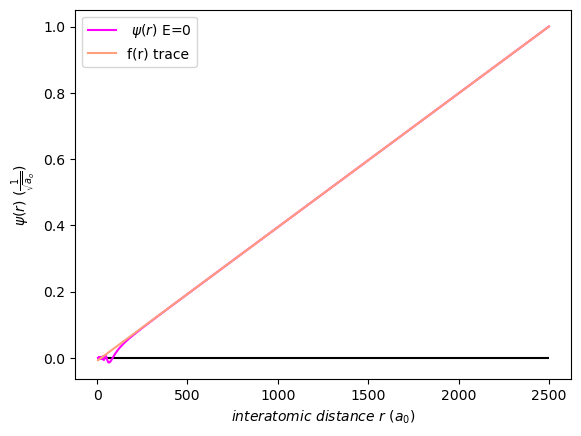

In [14]:
plt.hlines(0, min(rr), max(rr), color = 'black')

plt.plot(rr, Psi, color = 'fuchsia', label = f' $\\psi(r)$ E=0')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{0})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')


#plt.plot(rr, h, label = 'list line', color = 'palegoldenrod')
def Psilinear(r_range):
    
    
    m = (Psi[-1] - Psi[-2])*(1/(r_range[-1] - r_range[-2]))
    b = Psi[-1] - (m*r_range[-1])
    y = m*r_range + b
    ro = -b/m
    return [y,ro]

linepsi = Psilinear(rr)
plt.plot(rr, linepsi[0], label = 'f(r) trace', color = 'lightsalmon')


plt.legend()
#plt.xlim(0,100)
#plt.ylim(-0.05, 0.1)

a0 = linepsi[1]
print(f' ao = {a0} Bohr radii')


 ao = 21.60696456004224 Bohr radii


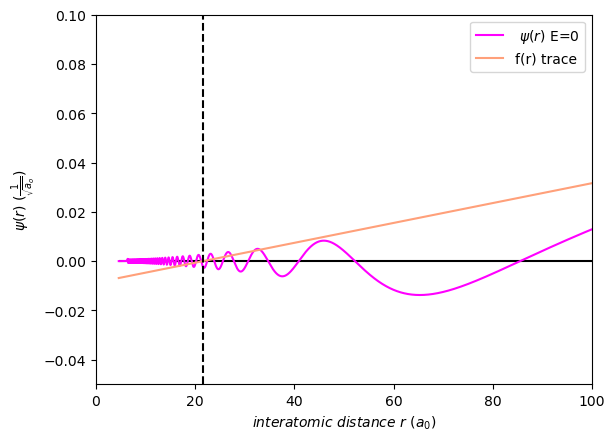

In [15]:
plt.hlines(0, min(rr), max(rr), color = 'black')

plt.plot(rr, Psi, color = 'fuchsia', label = f' $\\psi(r)$ E=0')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{0})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')

linepsi = Psilinear(rr)
plt.plot(rr, linepsi[0], label = 'f(r) trace', color = 'lightsalmon')


plt.legend()
plt.xlim(0,100)
plt.ylim(-0.05, 0.1)

a0 = linepsi[1]
print(f' ao = {a0} Bohr radii')
plt.vlines(a0, -0.05, 0.1, color= 'black', linestyle = 'dashed')

(9, 10)


C:\Users\nienn\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\nienn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


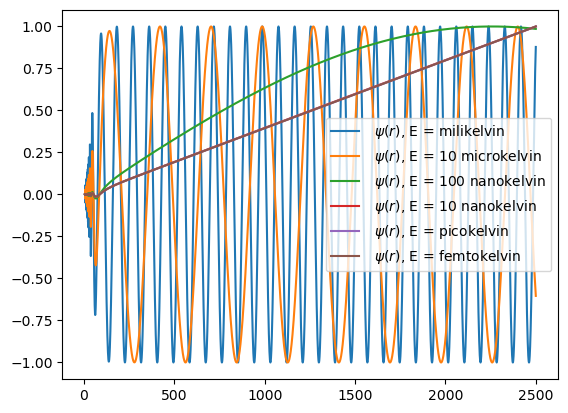

In [16]:

E_list = np.flip([1e-6*3.166808534191e-12, 100e-6*3.166808534191e-12, 1e-3*3.166808534191e-12, 10e-3*3.166808534191e-12, 100e-3*3.166808534191e-12, 1*3.166808534191e-12, 10*3.166808534191e-12, 1000*3.166808534191e-12, 10000*3.166808534191e-12])
prefix = np.flip(['femto', 'pico', '0.1 nano', '10 nano', 'nano', '100 nano', 'micro', '10 micro', 'mili', '10 mili'])

print((len(E_list),len(prefix)))
tries = [0, 1, 3, 5, 7, 8]

r1 = 4.6 #ao
r2 = 2.5e3 #ao
numpts = int(((r2 - r1)*(1/dr)) + 1)
rrr = np.linspace(r1,r2,numpts)
PsiENL = []

    
for NUM in tries:
    PsiE = np.zeros(numpts)
    PsiENL = wavefunction(E_list[NUM], numpts, r1, r2, dr)
    plt.plot(rrr, PsiENL, label = f' $\\psi(r)$, E = {prefix[NUM + 1]}kelvin')

plt.legend()


# scattering length vs Energy

2484.737904587633
2470.8216855663645
2854.1916846800623
4494.196515611336
21.939516231134355
21.73691085185263
21.95567865546491
21.781548687302436
21.62401686372054
21.62221843464605


Text(0, 0.5, 'scattering length (ao)')

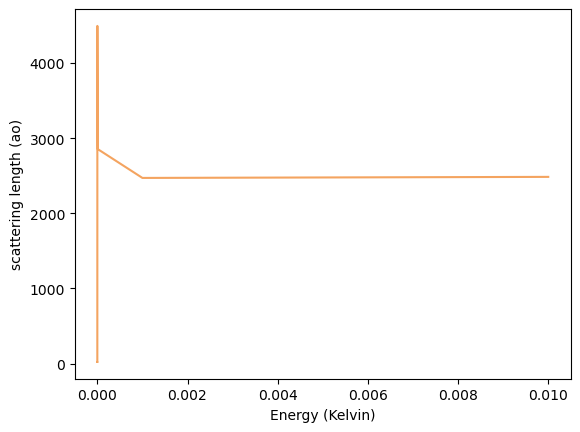

In [18]:
E_list = np.flip([1e-9*3.166808534191e-12,1e-6*3.166808534191e-12, 100e-6*3.166808534191e-12, 1e-3*3.166808534191e-12, 10e-3*3.166808534191e-12, 100e-3*3.166808534191e-12, 1*3.166808534191e-12, 10*3.166808534191e-12, 1000*3.166808534191e-12, 10000*3.166808534191e-12])
r1 = 4.6 # ao
r2 = 2500 # ao
numpts = int(((r2 - r1)*(1/dr)) + 1)
rr = np.linspace(r1,r2, numpts)
#print(f'numpts = {numpts}')
deltas = []
kE = []
tan_arg = []
as_E = []

for i in range(len(E_list)):
    
    psi = np.zeros(numpts)
    Psi = wavefunction(E_list[i], numpts, r1, r2, dr)
    Psi_prime = np.gradient(Psi, rr)
    VLJ = (C12*(1/(rr**12))) - (C6*(1/(rr**6)))
    koE = 2*mu*(E_list[i] - VLJ[-1])
    kE.append(koE)
#print(f' percent_diff(k(with pot), kapprox = {percent_diff(ko2, kEsmall)}')
#print(f' kr = {np.sqrt(ko2)*r2}')
    #ko2min = 2*mu*(Eo - min(VLJ_r2))
    #if i == 0:
        #print(f' len(Psi) = {len(Psi_r1)}')
        #print(f' len(r1) = {len(r1_range)}')
        #print(f' len(ksq) = {len(ko1)}')
        #print(f' len(VLJ) = {len(VLJ_r1)}')
    delta = np.arctan((np.sqrt(koE)*Psi[-1])*(1/(Psi_prime[-1]))) - np.sqrt(koE)*rr[-1]
    deltas.append(delta)
    as_E.append(-1*delta/np.sqrt(koE))
    print(-1*delta/np.sqrt(koE))
    tan = (np.sqrt(koE)*Psi[-1])*(1/(Psi_prime[-1]))
    tan_arg.append(tan)
    psip_r2 = Psi_prime[-1]
    #if i == int(0.5*len(E_list)):
      #  print('half way there!')
    #if i == int(0.9*len(E_list)):
     #   print('almost there!')


for i in range(len(E_list)):
    E_list[i] = E_list[i]*H_to_K


#plt.plot(E_list, as_E, color = 'sandybrown')
#plt.xlabel('Energy (Kelvin)')
#plt.ylabel('scattering length (ao)')

[1.e-02 1.e-03 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09 1.e-10 1.e-12 1.e-15]


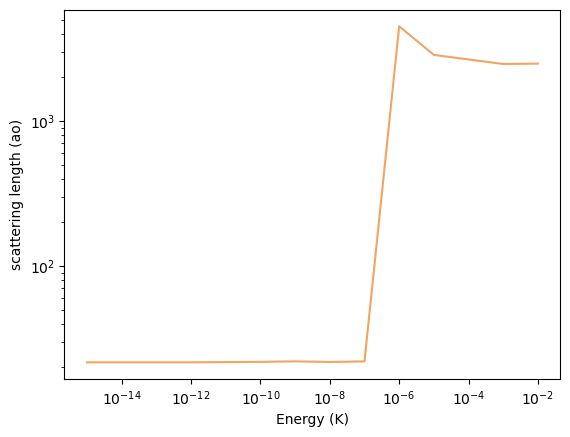

In [19]:
plt.loglog(E_list, as_E, color = 'sandybrown')
plt.xlabel('Energy (K)')
plt.ylabel('scattering length (ao)')

aE_diff = []
for i in range(len(as_E)):
    a_diff = percent_diff(as_E[i], -1*a0)
    aE_diff.append(a_diff)
prefix = np.flip(prefix)
prefix = np.flip(prefix)
#for i in range(len(aE_diff)):
 #   if aE_diff[i] < 1:
  #      print(f' at E = {prefix[i]}K, a has converged to ao within 1%')


print(E_list)

In [20]:
print(deltas)
print(kE)
print(tan_arg)

[-174.5310837914159, -54.88246459322932, -6.339798708610004, -3.156789197597558, -0.004873404674280435, -0.0015272926791213837, -0.0004891678562197466, -0.0001575876754927978, -4.0449445421049564e-05, -3.7489324629538454e-05]
[0.004933832492053885, 0.0004933832519105048, 4.9338354947330955e-06, 4.933862545897158e-07, 4.9341330575377825e-08, 4.936838173944026e-09, 4.963889338006462e-10, 5.2344009786308266e-11, 3.499068144731087e-12, 3.0061782790751718e-12]
[1.8358610004753515, 0.7572350618436029, -1.002685326846096, -5.8240538702090054, 0.6137235867503836, 0.1759108360142081, 0.055266466459788194, 0.017931623928795663, 0.0046360328379552816, 0.004297120638712167]


half way there!
almost there!


Text(0, 0.5, 'scattering length (ao)')

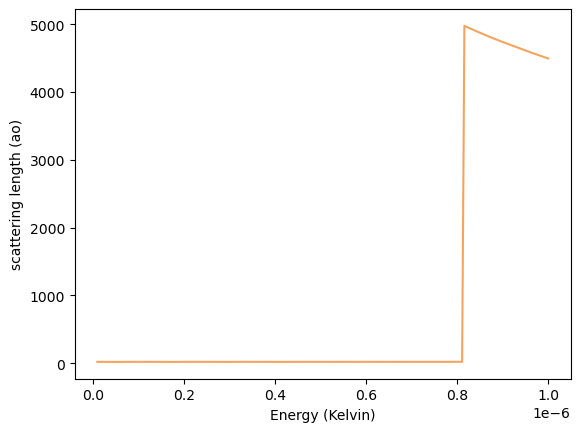

In [21]:
E_list = np.linspace(1e-2*3.166808534191e-12,3.166808534191e-12,200)
r1 = 4.6 # ao
r2 = 2500 # ao
numpts = int(((r2 - r1)*(1/dr)) + 1)
rr = np.linspace(r1,r2, numpts)
#print(f'numpts = {numpts}')
deltas = []
kE = []
tan_arg = []
as_E = []

for i in range(len(E_list)):
    
    psi = np.zeros(numpts)
    Psi = wavefunction(E_list[i], numpts, r1, r2, dr)
    Psi_prime = np.gradient(Psi, rr)
    VLJ = (C12*(1/(rr**12))) - (C6*(1/(rr**6)))
    koE = 2*mu*(E_list[i] - VLJ[-1])
    kE.append(koE)
#print(f' percent_diff(k(with pot), kapprox = {percent_diff(ko2, kEsmall)}')
#print(f' kr = {np.sqrt(ko2)*r2}')
    #ko2min = 2*mu*(Eo - min(VLJ_r2))
    #if i == 0:
        #print(f' len(Psi) = {len(Psi_r1)}')
        #print(f' len(r1) = {len(r1_range)}')
        #print(f' len(ksq) = {len(ko1)}')
        #print(f' len(VLJ) = {len(VLJ_r1)}')
    delta = np.arctan((np.sqrt(koE)*Psi[-1])*(1/(Psi_prime[-1]))) - np.sqrt(koE)*rr[-1]
    deltas.append(delta)
    as_E.append(-1*delta/np.sqrt(koE))
    #print(-1*delta/np.sqrt(koE))
    #tan = (np.sqrt(koE)*Psi[-1])*(1/(Psi_prime[-1]))
    #tan_arg.append(tan)
    #psip_r2 = Psi_prime[-1]

    if i == int(0.5*len(E_list)):
        print('half way there!')
    if i == int(0.9*len(E_list)):
        print('almost there!')


for i in range(len(E_list)):
    E_list[i] = E_list[i]*H_to_K


plt.plot(E_list, as_E, color = 'sandybrown')
plt.xlabel('Energy (Kelvin)')
plt.ylabel('scattering length (ao)')

162
22.36973793164722
256079.50879054802


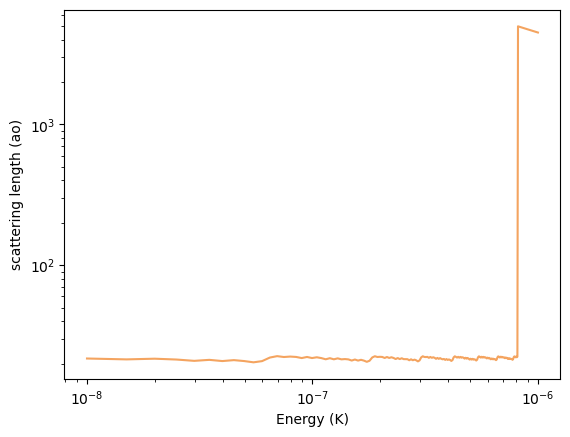

In [22]:
plt.loglog(E_list, as_E, color = 'sandybrown')
plt.xlabel('Energy (K)')
plt.ylabel('scattering length (ao)')


aE_diff = []
for i in range(1,len(as_E)):
    a_diff = as_E[i] - as_E[i-1]
    if a_diff > 1000:
        print(i)
prefix = np.flip(prefix)
prefix = np.flip(prefix)
#for i in range(len(aE_diff)):
 #   if aE_diff[i] < 1:
  #      print(f' at E = {prefix[i]}K, a has converged to ao within 1%')

print(as_E[161])
print(E_list[161]/Eo)
scalef = E_list[161]/Eo

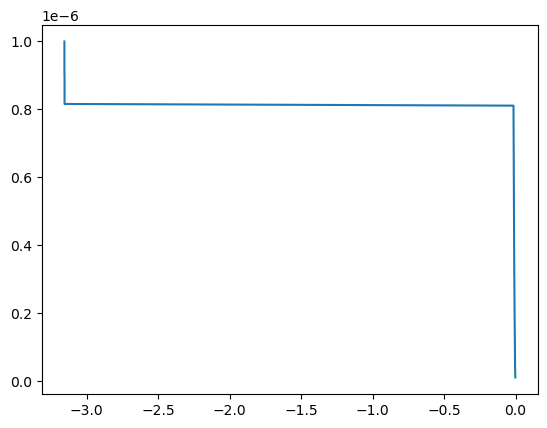

In [23]:
plt.plot(deltas,E_list)

In [44]:
print(Eo)
k1r21 = np.sqrt(2*mu*(1e-3*Eo - ((C12*(1/(2000**12))) - (C6*(1/(2000**6))))))*2000
k2r22 = np.sqrt(2*mu*(E_list[161] - ((C12*(1/(2500**12))) - (C6*(1/(2500**6))))))*2500

print(k1r21)
print(k2r22/2*np.pi)

3.166808534191e-12
0.04493769138966793
1395.852407579909


In [25]:
print(np.sqrt(1e-3))

0.03162277660168379
